 # Machine Learning and Predictive Modeling - Assignment 1
 ### Arpit Parihar
 ### 04/07/2021
 ****

 **Importing modules**

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

### Part A: Data Cleaning & Exploratory Analysis
1\. Import full data set using Pandas:
 - Verify that the shape is: (864863, 74)

In [2]:
data = pd.read_csv('bottle.csv')
data.head()
data.shape

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(864863, 74)

2\. Limit the dataset to the following columns: \[T_degC, Salnty, STheta\] and then remove all NaN and NA values (Hint: Pandas has a method for this) .
   - Verify the shape is: (812174, 3)

In [3]:
data_clean = data[['T_degC', 'Salnty', 'STheta']].dropna()
data_clean.shape

(812174, 3)

 3\. Build the following plots using matplotlib:

    a) Scatter: Salnty (salinity of water) vs T_degC

    b) Scatter: STheta (density of water) vs T_degC

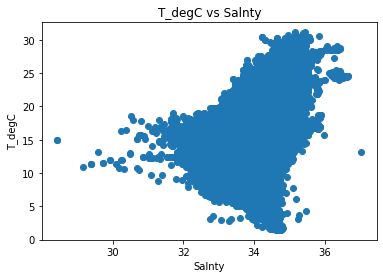

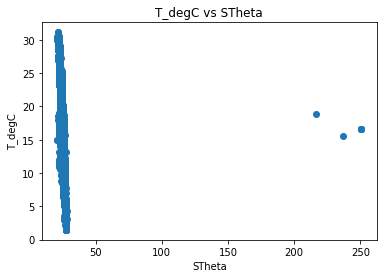

In [4]:


def plot_scatter(x, y):
    plt.scatter(x, y)
    plt.title(f'{y.name} vs {x.name}')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()


plot_scatter(data_clean['Salnty'], data_clean['T_degC'])
plot_scatter(data_clean['STheta'], data_clean['T_degC'])

 4\. Build the following plot using seaborn:

     a) Distribution of T_degC (hint: distplot will be helpful here)

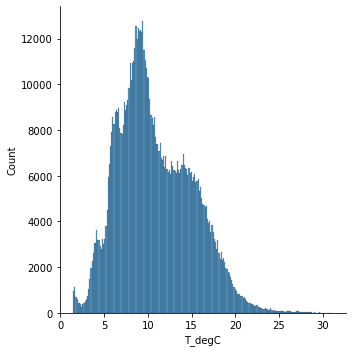

In [5]:
sns.displot(data_clean['T_degC']);

5\. Remove obvious outliers from step 3b:
   - Shape for clean data will be: (812168, 3)
   - Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section.

In [6]:
z_scores = (data_clean['STheta'] -
            np.mean(data_clean['STheta'])) / np.std(data_clean['STheta'])
data_clean = data_clean[z_scores < 3]
data_clean.shape

(812168, 3)

6\. Plot 3b again – does it look better? Explain!

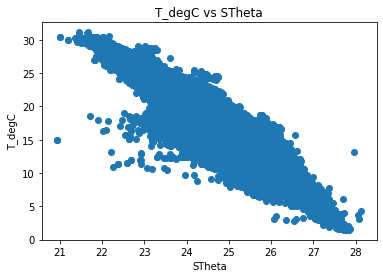

In [7]:
plot_scatter(data_clean['STheta'], data_clean['T_degC'])

 The plot looks much better as removing the outliers re-adjusts the scale, which make the shape of the data clearer

 ## Part B: Train & Test Split:
 As we know, we must generate a training set for model building and a testing set for model validation. Feel free to perform these steps however you want, but please note that sklearn has a `train_test_split` class that is perfect for this type of work: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Our X matrix (features / independent variables) will be: \[Salnty, STheta\]
Our y matrix (target / dependent variable) will be: T_degC
Build out the following:
- X_train
- X_test
- y_train
- y_test
 
Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [8]:
X = data_clean.drop(columns='T_degC')
y = data_clean['T_degC']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

## Part C: Linear Regression Using Normal Equation - Coded In Python

We will start by building our linear regression model using numpy. If you need help for this, please refer to https://github.com/ageron/handson-ml where a similar example can be found under Chapter 4.

We will use the closed-form solution called the Normal Equation to solve the following:

1\. Build the normal equation using numpy & fit using your training data (X_train & y_train).

   - Note: Make sure to include an intercept value of 1 for every observation in your X_train.

In [10]:
# Adding intercept
X_train.insert(0, 'Intercept', [1] * len(X_train))

# Fitting model
beta_eq = np.linalg.inv(X_train.transpose().dot(X_train)).dot(
    X_train.transpose()).dot(y_train)

2\. Print out the coefficients - we will need to compare these to the output in Part 4

In [11]:
pd.DataFrame(beta_eq, index=X_train.columns, columns=['Coefficients'])

,Coefficients
Intercept,35.789741
Salnty,3.104749
STheta,-5.035836


3\. Predict T_degC for the test data using the fitted values in b.

   - Make sure to include an intercept value of 1 for every observation in your X_test.

   - Call predictions y_pred

In [12]:
X_test.insert(0, 'Intercept', [1] * len(X_test))
y_pred_eq = X_test.dot(beta_eq)

4\. Calculate the following for the test data:
  - mean squared error
  - r-squared
  - explained variance
  - Note: [https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [13]:
print(f'Mean Squared Error = {mean_squared_error(y_test, y_pred_eq):.4f}')
print(f'R\N{SUPERSCRIPT TWO} = {r2_score(y_test, y_pred_eq):.4f}')
print(f'Explained Variance = {explained_variance_score(y_test, y_pred_eq):.4f}')

Mean Squared Error = 0.2312
R² = 0.9870
Explained Variance = 0.9870


5\. Create a scatterplot that shows actual versus predicted values for the T_degC.

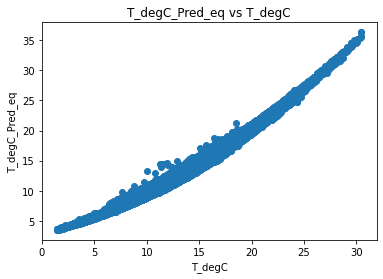

In [14]:
plot_scatter(y_test, pd.Series(y_pred_eq, name='T_degC_Pred_eq'))

## Part D: Using sklearn API

sklearn is a fantastic tool within python full of various model classes. For this portion of the assignment, use the class LinearRegression to replicate work done in Part C. Specifically, you should create an instance of the following class:

 [https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

1\. Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.

 - Note: sklearn will automatically add the intercept term, so you do not need to do this here.

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.drop(columns=['Intercept']), y_train)

LinearRegression()

2\. Print out the coefficients (including the intercept)
 - Note: These should be EXACTLY the same as what you found in Part C step 2

In [16]:
beta_sk = [lin_reg.intercept_] + list(lin_reg.coef_)
pd.DataFrame(beta_sk, index=X_train.columns, columns=['Coefficients'])

,Coefficients
Intercept,35.789741
Salnty,3.104749
STheta,-5.035836


3\. Predict T_degC for the test data using the fitted values in b.
  - Call predictions y_pred_sklearn

In [17]:
y_pred_sk = lin_reg.predict(X_test.drop(columns=['Intercept']))

4\. Calculate the following for the test data:
   - mean squared error
   - r-squared
   - explained variance

In [18]:
print(f'Mean Squared Error = {mean_squared_error(y_test, y_pred_sk):.4f}')
print(f'R\N{SUPERSCRIPT TWO} = {r2_score(y_test, y_pred_sk):.4f}')
print(f'Explained Variance = {explained_variance_score(y_test, y_pred_sk):.4f}')

Mean Squared Error = 0.2312
R² = 0.9870
Explained Variance = 0.9870


5\. Create a scatterplot that shows actual versus predicted values for the T_degC.

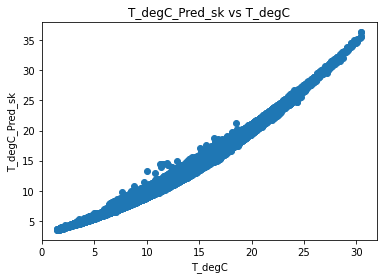

In [19]:
plot_scatter(y_test, pd.Series(y_pred_sk, name='T_degC_Pred_sk'))

## Part E: Conceptual Questions

**1\. Why is it important to have a test set?**

A test set is important to check the performance of the model on unseen data. It indicates how well the model is generalizing, i.e. if it's overfitting or underfitting to the training set.

**2\. If the normal equation always provides a solution, when would we not want to use it?**

Although the normal equation always provides a solution, it's computationally expensive as it requires several matrix multiplications, transpose, and even an inversion. It may not be prudent to use the normal equation when the number of features in the model are high, as the X matrix will be huge.

**3\. How might we improve the fit of our models from Part C & D?**
   - Note: There are lots of possible answers to this section - just describe one in detail.

Adding more predictors to the model will improve the fit (or keep it the same). Adding variables always either increases the $R^{2}$ or keeps it the same, as each new variable can only add information to the model, or keep it the same. No new variable can take information away from the model, and the $R^{2}$ will never go down upon addition.

This is why adjusted $R^{2}$ is a better metric, as each new variable added is penalized, and if the decrease in sum of squares is not significant enough to counteract the penalty, ajusted $R^{2}$ goes down.

If no more predictors are available, adding interaction terms or higher order polynomials would also improve the fit.

**4\. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff.**

Bias in a model means that the model is overly simple, and unable to detect patterns in the data. It can also be construed as how far the average prediction is from the average actual value. If both the training and testing accuracies are low, the model might have high bias

Variance means that the model is fitting to the noise in the training data, and will generalize poorly, resulting in poor or fluctuating accuracy on the test data.

The total error in a model can be broken down as:
$$Err(x) = Bias^{2} + Variance + RandomError$$

As bias goes up, variance goes down, this is called as bias-variance tradeoff. It doesn't have to be a 1 to 1 relationship though, introducing a small amount of bias might lead to a huge reduction in variance.

**5\. In a linear regression model, how might we reduce bias?**

All the points mentioned in Q3 apply here as well, as improving the fit amounts to reducing bias in the model. To reiterate:
 - Adding more variables
 - Adding interaction terms
 - Adding higher order terms

Another way to reduce bias would be fitting splines, which is fitting multiple lines to different subsets of data

**6\. In a linear regression model, how might we reduce variance?**

To reduce variance, there are many options:
 - Use fewer variables
 - Add L1 or L2 regularization penalty to loss function
 - Use bagged regression model on bootstrapped data